<a href="https://colab.research.google.com/github/jonathanmendoza-tx/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Jonathan_Mendoza_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Explore 

In [3]:
print(cell_phones.shape)
cell_phones.head()

(9215, 3)


,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [4]:
print(population.shape)
population.head()

(59297, 3)


,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [5]:
print(geo_country_codes.shape)
geo_country_codes.head()

(273, 33)


,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [6]:
merged = cell_phones.merge(population, on = ['geo','time'])
print(merged.shape)
merged.head()

(8590, 4)


,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [7]:
df = merged.merge(geo_country_codes[['geo','country']], on = 'geo')
print(df.shape)
df.head()


(8590, 5)


,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [8]:
df['cell_pp'] = df['cell_phones_total']/df['population_total']
print(df[(df['country']=='United States')& (df['time'] == 2017)])
df.head()

      geo  time  cell_phones_total  population_total        country   cell_pp
8134  usa  2017        395881000.0         324459463  United States  1.220125


,geo,time,cell_phones_total,population_total,country,cell_pp
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [9]:
df['geo'] = df['geo'].str.upper()
df.head()

,geo,time,cell_phones_total,population_total,country,cell_pp
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [10]:
df.describe()

,time,cell_phones_total,population_total,cell_pp
count,8590.000000,8.590000e+03,8.590000e+03,8590.000000
mean,1994.193481,9.004950e+06,2.983823e+07,0.279639
std,14.257975,5.573408e+07,1.161284e+08,0.454247
min,1960.000000,0.000000e+00,4.433000e+03,0.000000
25%,1983.000000,0.000000e+00,1.456148e+06,0.000000
50%,1995.000000,6.200000e+03,5.725062e+06,0.001564
75%,2006.000000,1.697652e+06,1.810581e+07,0.461149
max,2017.000000,1.474097e+09,1.409517e+09,2.490243


In [11]:
df.describe(include = 'object')

,geo,country
count,8590,8590
unique,195,195
top,MCO,Iceland
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [13]:
from IPython.display import display, HTML

top_cell = df[['country','cell_phones_total']].sort_values(by = 'cell_phones_total', ascending = False)
top_cell.drop_duplicates(subset = 'country', inplace = True)
display(HTML(top_cell[:5].to_html(index=False)))

country,cell_phones_total
China,"1,474,097,000.0"
India,"1,168,902,277.0"
Indonesia,"458,923,202.0"
United States,"395,881,000.0"
Brazil,"280,728,796.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [14]:
df[(df['country']=='United States')&(df['cell_phones_total']>df['population_total'])]

,geo,time,cell_phones_total,population_total,country,cell_pp
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


2014 was the first year the USA had more cell phones than people

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [15]:
countries = ['China', 'India', 'United States', 'Indonesia', 'Brazil']
df_filtered = df[(df['country'].isin(countries))& (df['time']>=2007)]
df_pivot = df_filtered.pivot_table(index = 'country', columns = 'time',values = 'cell_phones_total')
print(df_pivot.shape)
df_pivot

(5, 11)


time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [16]:
df_pivot['total_change'] = df_pivot[2017]-df_pivot[2007]
df_pivot.sort_values(by = 'total_change', ascending = False, inplace = True)
df_pivot

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,total_change
country,,,,,,,,,,,,
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0","935,282,277.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0","926,791,000.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0","365,536,321.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0","146,581,000.0"
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0","115,508,445.0"


India has the highest total change, with a difference of 935,282,277 more cell phones in 2017 vs 2007

If you have the time and curiosity, what other questions can you ask and answer with this data?
 

*   What was each country's rate of change for each year
*   When was the highest rate of change and for what country
*   Who had the lowest rate of change and when

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [18]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 6 columns):
Year                         2693 non-null int64
GoogleKnowlege_Occupation    2667 non-null object
Show                         2693 non-null object
Group                        2662 non-null object
Guest                        2693 non-null object
Occupation                   2693 non-null object
dtypes: int64(1), object(5)
memory usage: 126.3+ KB
None


,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [19]:
df.groupby('Year')['Occupation'].value_counts(normalize = True)*100

Year  Occupation             
1999  Acting, Comedy & Music     90.36144578313254
      Media                      6.626506024096386
      Other                     1.8072289156626504
      Government and Politics   1.2048192771084338
2000  Acting, Comedy & Music     73.96449704142012
      Media                      12.42603550295858
      Government and Politics    8.284023668639055
      Other                      5.325443786982249
2001  Acting, Comedy & Music     72.61146496815286
      Media                     19.745222929936308
      Government and Politics    3.821656050955414
      Other                      3.821656050955414
2002  Acting, Comedy & Music    62.264150943396224
      Media                      26.41509433962264
      Government and Politics    6.918238993710692
      Other                       4.40251572327044
2003  Acting, Comedy & Music    56.024096385542165
      Media                      24.69879518072289
      Government and Politics   10.240963855421686
 

In [20]:
cross_df = pd.crosstab(df['Year'], df['Occupation'], normalize = 'index')*100
cross_df


Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.36144578313254,1.2048192771084338,6.626506024096386,1.8072289156626504
2000,73.96449704142012,8.284023668639055,12.42603550295858,5.325443786982249
2001,72.61146496815286,3.821656050955414,19.745222929936308,3.821656050955414
2002,62.264150943396224,6.918238993710692,26.41509433962264,4.40251572327044
2003,56.024096385542165,10.240963855421686,24.69879518072289,9.036144578313253
2004,38.41463414634146,22.5609756097561,27.439024390243905,11.585365853658537
2005,37.03703703703704,16.049382716049383,33.33333333333333,13.580246913580247
2006,36.024844720496894,19.25465838509317,29.19254658385093,15.527950310559005
2007,25.53191489361702,17.02127659574468,33.33333333333333,24.113475177304963


### Part 2 — Recreate this explanatory visualization:

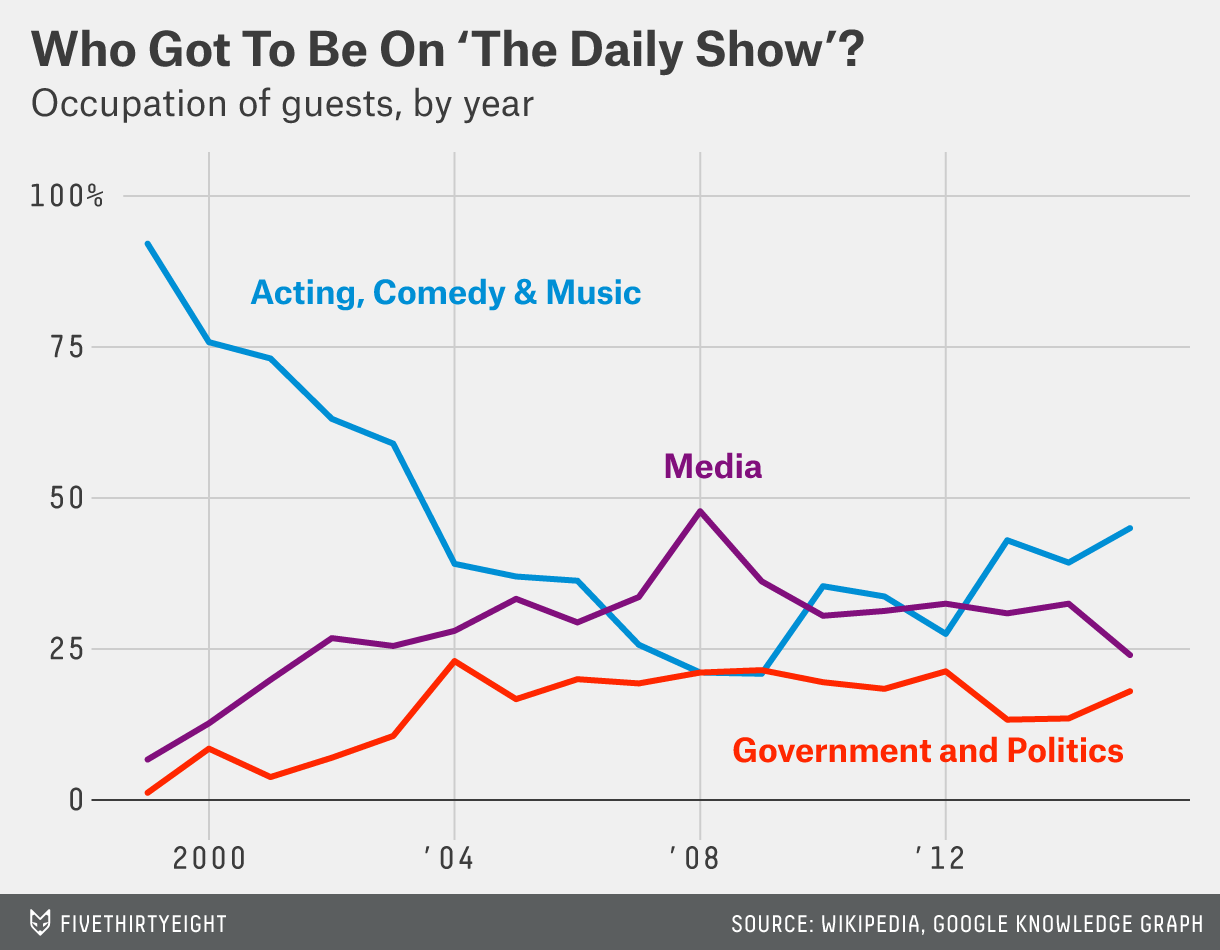

In [21]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

cross_df = cross_df.drop(columns = ['Other'])

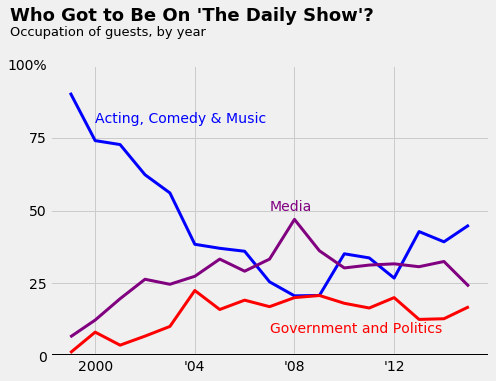

In [49]:
years = cross_df.index.tolist()
acm = cross_df['Acting, Comedy & Music'].tolist()
gap = cross_df['Government and Politics'].tolist()
med = cross_df['Media'].tolist()

plt.style.use('fivethirtyeight')
#lines for plotting
fig, ax = plt.subplots(figsize = (7,5))
ax1 = sns.lineplot(x = years, y = acm, color = 'blue', lw = 3)
ax2 = sns.lineplot(x = years, y = gap, color = 'red', lw = 3)
ax3 = sns.lineplot(x = years, y = med, color = 'purple', lw = 3)

#graph parameters
plt.ylim(0,100)
plt.text(x = 2000, y = 80, s = 'Acting, Comedy & Music', color = 'blue' )
plt.text(x = 2007, y = 50, s = 'Media', color = 'purple' )
plt.text(x = 2007, y = 8, s = 'Government and Politics', color = 'red' )
# plt.title("Who Got to Be On 'The Daily Show'?",pad = 50, fontsize = 17,fontweight = "bold", loc = 'left')
plt.text(x = 1996.6, y = 115, s = "Who Got to Be On 'The Daily Show'?", color = 'black', fontsize = 18, fontweight = "bold" )
plt.text(x = 1996.6, y = 110, s='Occupation of guests, by year', fontsize = 13)


ax.set_yticks([0, 25, 50, 75, 100])
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'])
ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(['2000', "'04", "'08", "'12"])
ax1.axhline(y=0, color = 'black')
plt.show()

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.